### This notebook includes fitting the pre-processed data from the Notebook01, applying Logistic Regression, SVM, Random Forest, Decision Tree and Neural Network and discussing the performance.

In [1]:
# To Ignore warnings from scikit-learn
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore")
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [49]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.neural_network import MLPClassifier

### Loading the pre-processed data from the Notebook01.

In [3]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

# Logistic Regression 

In [4]:
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [5]:
# Make predictions
y_pred_logistic = logistic_reg.predict(X_test)

#### Measuring the performance of Logistic Regression model

In [6]:
# Accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)

# Classification Report
class_report_logistic = classification_report(y_test, y_pred_logistic)

print(f'Logistic Regression Accuracy: {accuracy_logistic}')
print(f'Logistic Regression Confusion Matrix: \n{conf_matrix_logistic}')
print(f'Logistic Regression Classification Report: \n{class_report_logistic}')

Logistic Regression Accuracy: 0.912381372765394
Logistic Regression Confusion Matrix: 
[[7804  232]
 [ 562  464]]
Logistic Regression Classification Report: 
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      8036
         yes       0.67      0.45      0.54      1026

    accuracy                           0.91      9062
   macro avg       0.80      0.71      0.75      9062
weighted avg       0.90      0.91      0.90      9062



#### Applying Random Search on Logistic Regression

In [ ]:
'''
# Define the logistic regression model
logistic_reg = LogisticRegression()

# Create a parameter grid with hyperparameter ranges to search
param_dist = {
    'C': np.logspace(-3, 3, 7),  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'max_iter': [100, 500, 1000],  # Maximum number of iterations for optimization
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
}

# Create a RandomizedSearchCV object
random_search_logistic = RandomizedSearchCV(
    logistic_reg, 
    param_distributions=param_dist, 
    n_iter=20,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Scoring metric
    n_jobs=-1,  # Use all available CPU cores
    random_state=42  # Random seed for reproducibility
)

# Fit the Random Search on the training data
random_search_logistic.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_logistic = random_search_logistic.best_params_
best_model_logistic = random_search_logistic.best_estimator_

# Evaluate the best model on the test data
y_pred_best_logistic = best_model_logistic.predict(X_test)
accuracy_best_logistic = accuracy_score(y_test, y_pred_best_logistic)

print(f'Best Hyperparameters (Logistic Regression): {best_params_logistic}')
print(f'Best Model Accuracy (Logistic Regression): {accuracy_best_logistic}')
'''

In [ ]:
'''
print(f'Best Hyperparameters: {best_params_logistic}')
print(f'Best Model Accuracy: {accuracy_best_logistic}')
'''

In [ ]:
'''
# Define the logistic regression model
logistic_reg = LogisticRegression()

# Create a parameter grid with hyperparameter ranges to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'max_iter': [100, 500, 1000],  # Maximum number of iterations for optimization
    'solver': ['liblinear', 'saga'],  # Optimization algorithm
}

# Create a GridSearchCV object
grid_search_logistic = GridSearchCV(
    logistic_reg, 
    param_grid=param_grid, 
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Scoring metric
    n_jobs=-1  # Use all available CPU cores
)

# Fit the Grid Search on the training data
grid_search_logistic.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_logistic = grid_search_logistic.best_params_
best_model_logistic = grid_search_logistic.best_estimator_

# Evaluate the best model on the test data
y_pred_best_logistic = best_model_logistic.predict(X_test)
accuracy_best_logistic = accuracy_score(y_test, y_pred_best_logistic)

print(f'Best Hyperparameters (Logistic Regression): {best_params_logistic}')
print(f'Best Model Accuracy (Logistic Regression): {accuracy_best_logistic}')

'''

In [ ]:
'''
print(f'Best Hyperparameters (Logistic Regression): {best_params_logistic}')
print(f'Best Model Accuracy (Logistic Regression): {accuracy_best_logistic}')

'''

# SVM

### Fitting a Linear Kernel model

In [7]:
# Initialize the model with a linear kernel
clf_linear = SVC(kernel='linear')
# Train the model
clf_linear.fit(X_train, y_train)
# Make predictions
y_pred_linear = clf_linear.predict(X_test)

### Measuring the performance of Linear Kernel model

In [8]:
# Accuracy
accuracy_linear = accuracy_score(y_test, y_pred_linear)
# Confusion Matrix
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)
# Classification Report
class_report_linear = classification_report(y_test, y_pred_linear)

print(f'Linear Kernel Accuracy: {accuracy_linear}')
print(f'Linear Kernel Confusion Matrix: \n{conf_matrix_linear}')
print(f'Linear Kernel Classification Report: \n{class_report_linear}')

Linear Kernel Accuracy: 0.9039947031560363
Linear Kernel Confusion Matrix: 
[[7836  200]
 [ 670  356]]
Linear Kernel Classification Report: 
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      8036
         yes       0.64      0.35      0.45      1026

    accuracy                           0.90      9062
   macro avg       0.78      0.66      0.70      9062
weighted avg       0.89      0.90      0.89      9062



### Fitting a Non-Linear Kernel (RBF) model

In [9]:
# Initialize the model with an RBF kernel
clf_rbf = SVC(kernel='rbf')
# Train the model
clf_rbf.fit(X_train, y_train)
# Make predictions
y_pred_rbf = clf_rbf.predict(X_test)

### Measuring the performance of Non-Linear Kernel model

In [10]:
# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
# Confusion Matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)
# Classification Report
class_report_rbf = classification_report(y_test, y_pred_rbf)

print(f'RBF Kernel Accuracy: {accuracy_rbf}')
print(f'RBF Kernel Confusion Matrix: \n{conf_matrix_rbf}')
print(f'RBF Kernel Classification Report: \n{class_report_rbf}')

RBF Kernel Accuracy: 0.9131538291767821
RBF Kernel Confusion Matrix: 
[[7830  206]
 [ 581  445]]
RBF Kernel Classification Report: 
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      8036
         yes       0.68      0.43      0.53      1026

    accuracy                           0.91      9062
   macro avg       0.81      0.70      0.74      9062
weighted avg       0.90      0.91      0.90      9062



# Random Forest 

In [11]:
# Initialize and train the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Measuring the performance of the Random Forest model
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Classification Report
class_report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix_rf}')
print(f'Random Forest Classification Report:\n{class_report_rf}')

Random Forest Accuracy: 0.9282719046568086
Random Forest Confusion Matrix:
[[7820  216]
 [ 434  592]]
Random Forest Classification Report:
              precision    recall  f1-score   support

          no       0.95      0.97      0.96      8036
         yes       0.73      0.58      0.65      1026

    accuracy                           0.93      9062
   macro avg       0.84      0.78      0.80      9062
weighted avg       0.92      0.93      0.92      9062



#### Applying Random search for Random Forest model

In [ ]:
'''
# Define the Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for Randomized Search
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'max_depth': [None] + list(range(10, 31)),  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be a leaf node
    'bootstrap': [True, False]  # Whether or not to use bootstrapping
}

# Create the Randomized Search CV object
random_search_rf = RandomizedSearchCV(
    rf_classifier, 
    param_distributions=param_grid, 
    n_iter=100,  # Number of random combinations to try
    scoring='accuracy',  # You can use different scoring metrics
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    random_state=42,
    verbose=1  # Show progress during the search
)

# Fit the Randomized Search on the training data
random_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params_rf = random_search_rf.best_params_
best_model_rf = random_search_rf.best_estimator_

# Evaluate the best model on the test data
y_pred_best_rf = best_model_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

print(f'Best Hyperparameters (Random Forest): {best_params_rf}')
print(f'Best Model Accuracy (Random Forest): {accuracy_best_rf}') 

'''

In [ ]:
'''
print(f'Best Hyperparameters: {best_params_rf}')
print(f'Best Model Accuracy: {accuracy_best_rf}')
'''

# Decision Tree 

In [12]:
# Initialize and train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred_decision = clf.predict(X_test)

### Measuring the performance of Decision-Tree model

In [14]:
# Accuracy
accuracy_decision = accuracy_score(y_test, y_pred_decision)
# Confusion Matrix
conf_matrix_decision = confusion_matrix(y_test, y_pred_decision)
# Classification Report
class_report_decision = classification_report(y_test, y_pred_decision)

print(f'Decision Tree Accuracy: {accuracy_decision}')
print(f'Decision Tree Confusion Matrix: \n{conf_matrix_decision}')
print(f'Decision Tree Classification Report: \n{class_report_decision}')

Decision Tree Accuracy: 0.9023394394173472
Decision Tree Confusion Matrix: 
[[7560  476]
 [ 409  617]]
Decision Tree Classification Report: 
              precision    recall  f1-score   support

          no       0.95      0.94      0.94      8036
         yes       0.56      0.60      0.58      1026

    accuracy                           0.90      9062
   macro avg       0.76      0.77      0.76      9062
weighted avg       0.91      0.90      0.90      9062



#### Applying Random Search for Decision Tree

In [ ]:
''''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for Randomized Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

# Create the Randomized Search CV object
random_search = RandomizedSearchCV(
    dt_classifier, 
    param_distributions=param_grid, 
    n_iter=100,  # Number of random combinations to try
    scoring='accuracy',  # You can use different scoring metrics
    cv=5,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Show progress during the search
)

# Fit the Randomized Search on the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f'Best Hyperparameters: {best_params}')
print(f'Best Model Accuracy: {accuracy_best}')
'''

#### Applying Grid Search for Decision Tree

In [ ]:
''''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for Grid Search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(range(1, 20)),  # Include None for no maximum depth
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

# Create the Grid Search CV object
grid_search = GridSearchCV(
    dt_classifier, 
    param_grid=param_grid,
    scoring='accuracy',  # You can use different scoring metrics
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    verbose=1  # Show progress during the search
)

# Fit the Grid Search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f'Best Hyperparameters: {best_params}')
print(f'Best Model Accuracy: {accuracy_best}')
'''

# XGBoost 

In [15]:
# Mapping function to convert 'yes' to 1 and 'no' to 0
y_train['y']= y_train['y'].map({'yes': 1, 'no': 0})
y_test['y'] = y_test['y'].map({'yes': 1, 'no': 0})

In [21]:
# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [22]:
# Make predictions on the test data using the trained model
y_pred = xgb_model.predict(X_test)

### Measuring the Performance of XGBoost Model

In [23]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Generate and print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9190024277201501
Confusion Matrix:
[[7732  304]
 [ 430  596]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      8036
           1       0.66      0.58      0.62      1026

    accuracy                           0.92      9062
   macro avg       0.80      0.77      0.79      9062
weighted avg       0.92      0.92      0.92      9062



# Neural Network (NN)

## Fitting a MLPClassifier model on the training dataset

In [25]:
%%time

ann = MLPClassifier(hidden_layer_sizes=(60,40,20), solver='adam', max_iter=500, random_state=42)
_ = ann.fit(X_train, y_train)

Wall time: 51.3 s


In [26]:
%%time

y_pred = ann.predict(X_test)

Wall time: 17.6 ms


## Measuring the performance on NN

In [27]:
print(classification_report(y_test, y_pred))

# Accuracy
accuracy_rbf = accuracy_score(y_test, y_pred)
# Confusion Matrix
conf_matrix_rbf = confusion_matrix(y_test, y_pred)
# Classification Report
class_report_rbf = classification_report(y_test, y_pred)

print(f'RBF Kernel Accuracy: {accuracy_rbf}')
print(f'RBF Kernel Confusion Matrix: \n{conf_matrix_rbf}')
print(f'RBF Kernel Classification Report: \n{class_report_rbf}')

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8036
           1       0.57      0.58      0.58      1026

    accuracy                           0.90      9062
   macro avg       0.76      0.76      0.76      9062
weighted avg       0.90      0.90      0.90      9062

RBF Kernel Accuracy: 0.9036636504082984
RBF Kernel Confusion Matrix: 
[[7591  445]
 [ 428  598]]
RBF Kernel Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8036
           1       0.57      0.58      0.58      1026

    accuracy                           0.90      9062
   macro avg       0.76      0.76      0.76      9062
weighted avg       0.90      0.90      0.90      9062



## Plotting the Gains Curve of the all the models 

In [ ]:
# Function to plot Lift and Gain Charts
def plot_lift_gain_chart(y_true, y_pred_proba):
    # Sort the probabilities and true labels in descending order
    sorted_indices = np.argsort(y_pred_proba)[::-1]
    sorted_y_true = y_true[sorted_indices]

    # Calculate the cumulative gains
    cum_gains = np.cumsum(sorted_y_true) / np.sum(sorted_y_true)

    # Calculate the lift values correctly
    baseline = np.linspace(0, 1, len(y_true))
    lift = cum_gains / baseline

    # Plot the Lift and Gain Charts
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(cum_gains, label='Cumulative Gains', color='b')
    plt.xlabel('Number of Samples')
    plt.ylabel('Cumulative Gains')
    plt.title('Gain Chart')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(lift, label='Lift', color='r')
    plt.xlabel('Number of Samples')
    plt.ylabel('Lift')
    plt.title('Lift Chart')
    plt.legend()
    plt.show()

## Random Forest 

In [51]:
y_pred_probarf = rf_classifier.predict_proba(X_test)[:, 1]
y_testnumpy_array_rf = y_test.to_numpy()

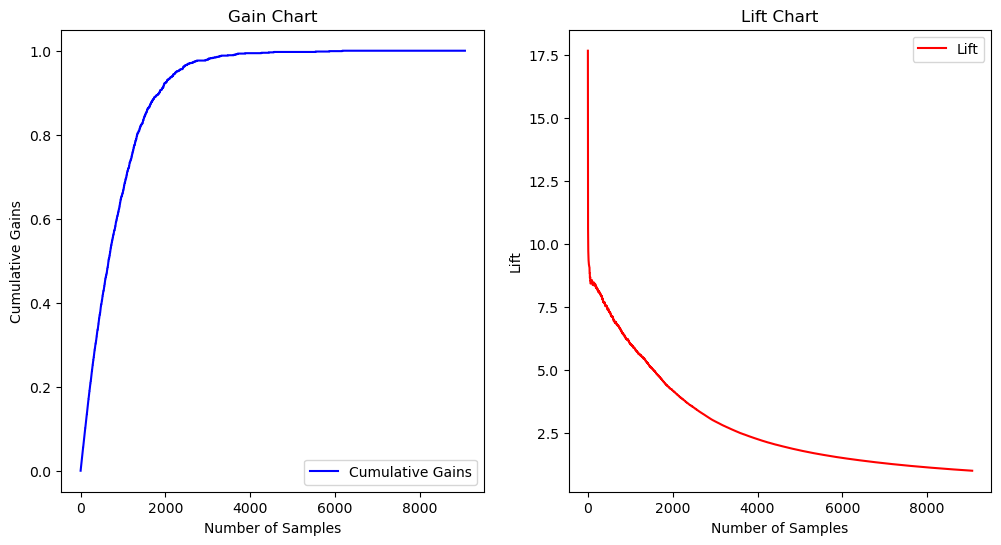

In [52]:
# Plot the Lift and Gain Charts
plot_lift_gain_chart(y_testnumpy_array_rf, y_pred_probarf)

## Logistic Regression

In [53]:
y_pred_probalr = logistic_reg.predict_proba(X_test)[:, 1]
y_testnumpy_array_lr = y_test.to_numpy()

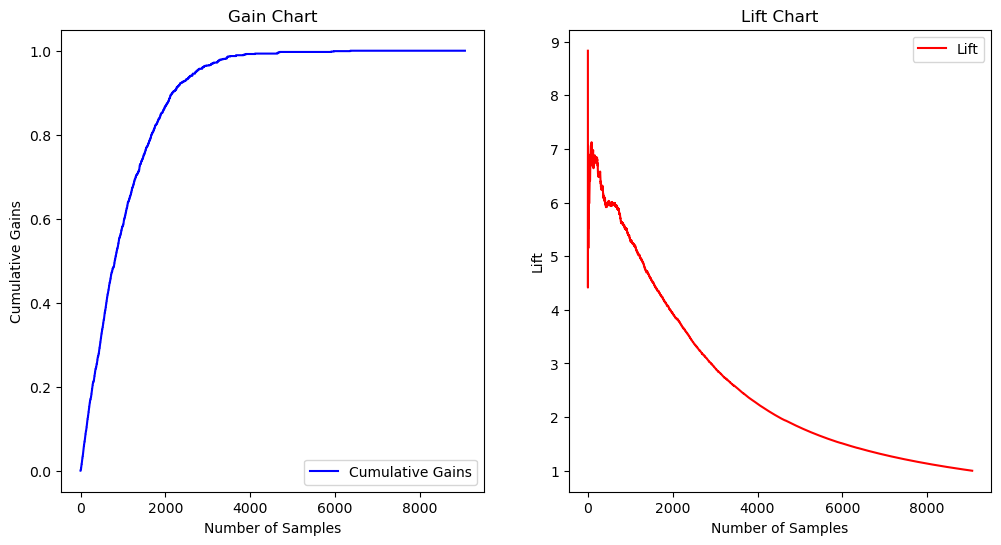

In [54]:
# Plot the Lift and Gain Charts
plot_lift_gain_chart(y_testnumpy_array_lr,y_pred_probalr)

## ROC and AUC Curve 